In [2]:
import pandas as pd

df = pd.read_csv("./challenge-2-bitcoin.csv")

df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-23 00:00:00,0.0,2110700.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,25100.000000,0.0,252.0,252.0,42613.0,252.0,252.0,12600.0,50.0,0.0
1,2010-02-24 00:00:00,0.0,2120200.0,0.0,0.0,0.0,0.000282,0.0,1.0,0.0,...,179.245283,0.0,195.0,196.0,42809.0,196.0,196.0,14800.0,5300.0,0.0
2,2010-02-25 00:00:00,0.0,2127600.0,0.0,0.0,0.0,0.000227,0.0,1.0,0.0,...,1057.142857,0.0,150.0,150.0,42959.0,150.0,150.0,8100.0,700.0,0.0
3,2010-02-26 00:00:00,0.0,2136100.0,0.0,0.0,0.0,0.000319,0.0,1.0,0.0,...,64.582059,0.0,176.0,176.0,43135.0,176.0,176.0,29349.0,13162.0,0.0
4,2010-02-27 00:00:00,0.0,2144750.0,0.0,0.0,0.0,0.000223,0.0,1.0,0.0,...,1922.222222,0.0,176.0,176.0,43311.0,176.0,176.0,9101.0,450.0,0.0


In [3]:
data = df[["btc_market_price", "btc_total_bitcoins", "btc_transaction_fees"]]
data.head()

,btc_market_price,btc_total_bitcoins,btc_transaction_fees
0,0.0,2110700.0,0.0
1,0.0,2120200.0,0.0
2,0.0,2127600.0,0.0
3,0.0,2136100.0,0.0
4,0.0,2144750.0,0.0


Text(0, 0.5, 'btc_transaction_fees')

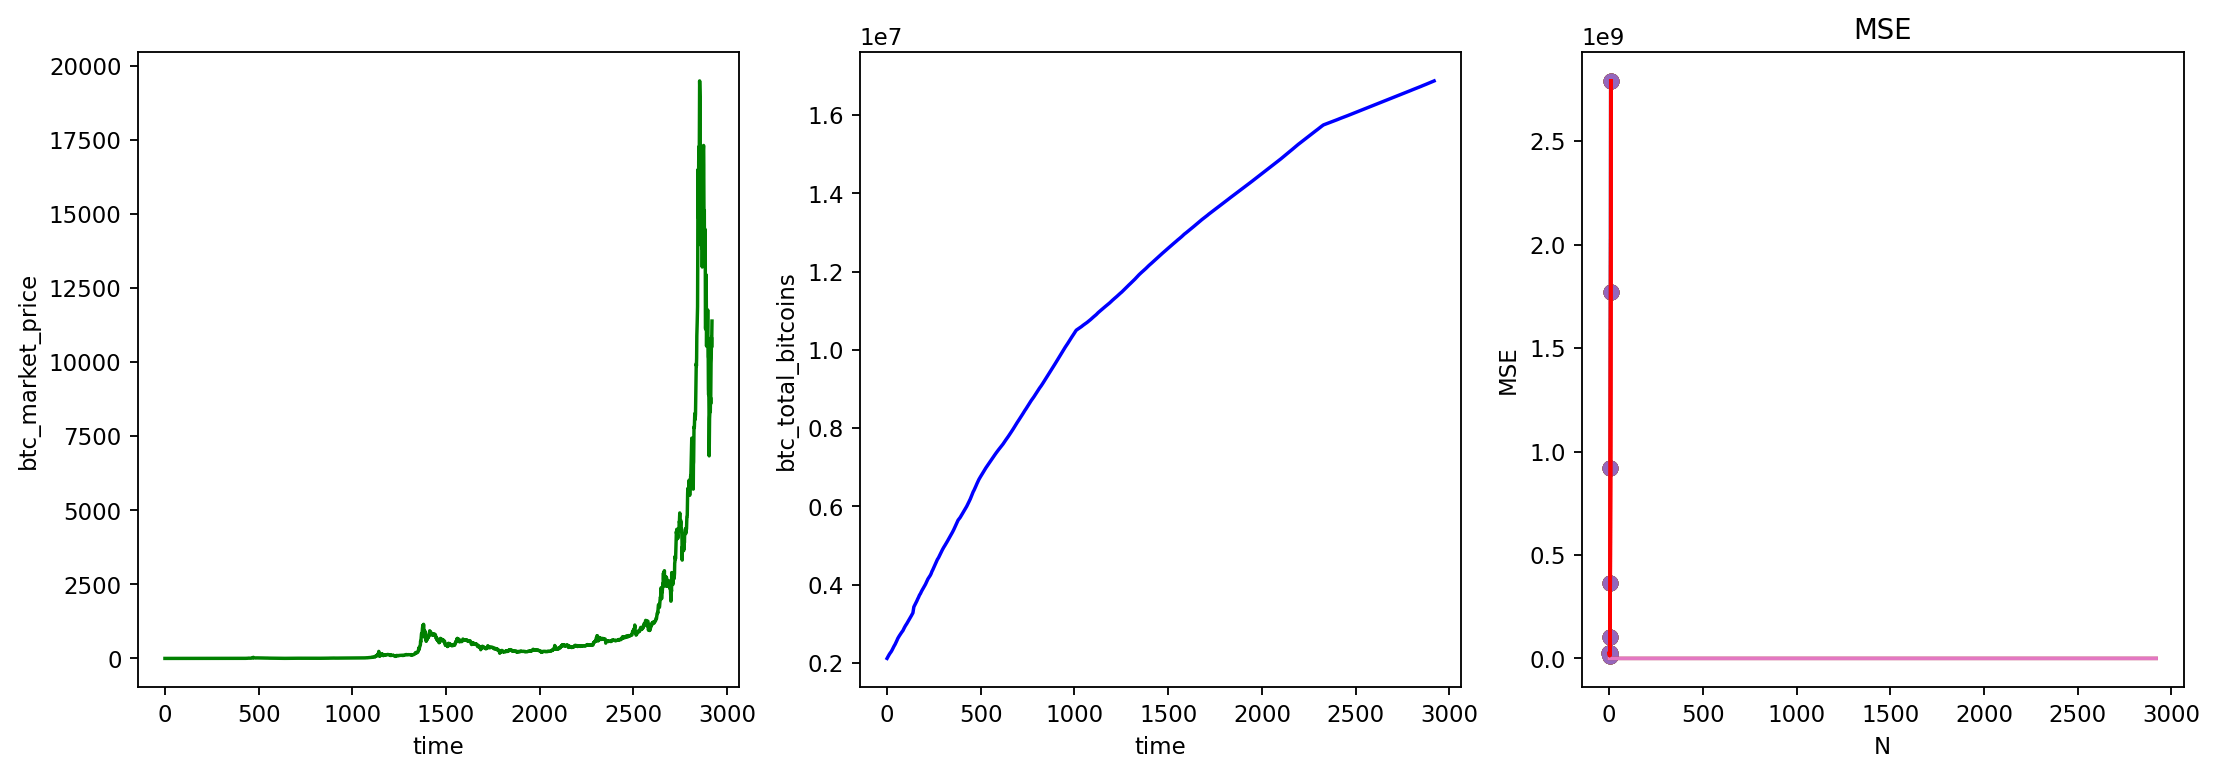

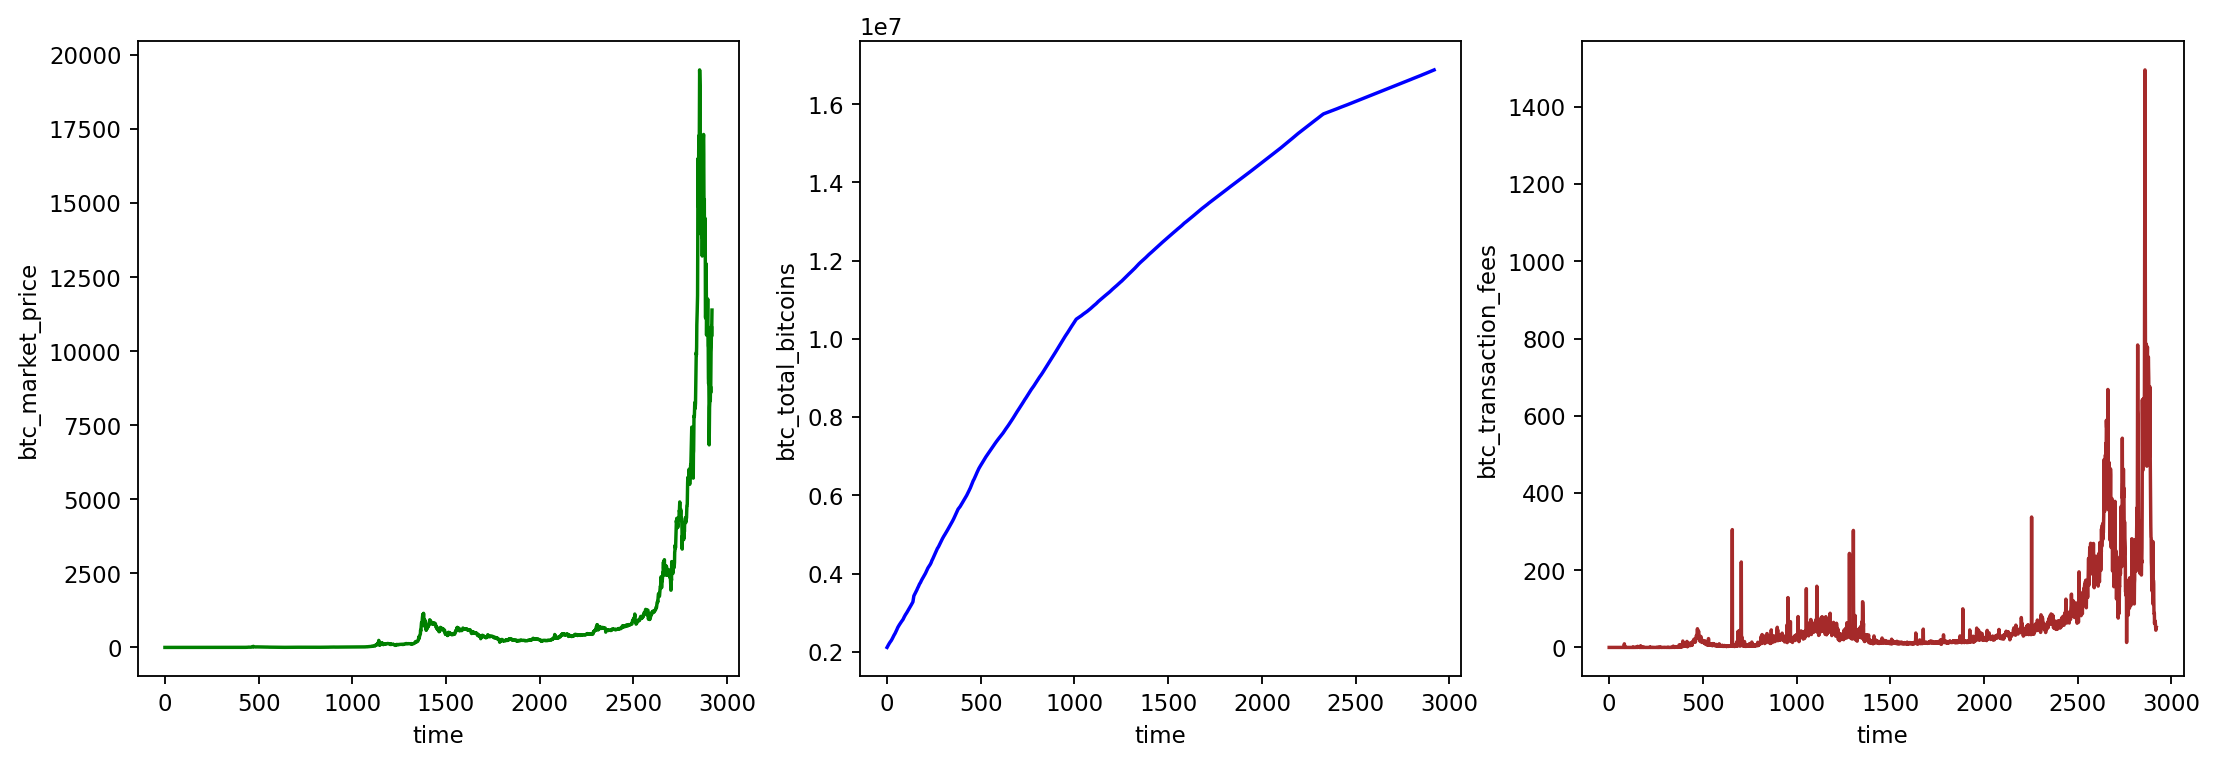

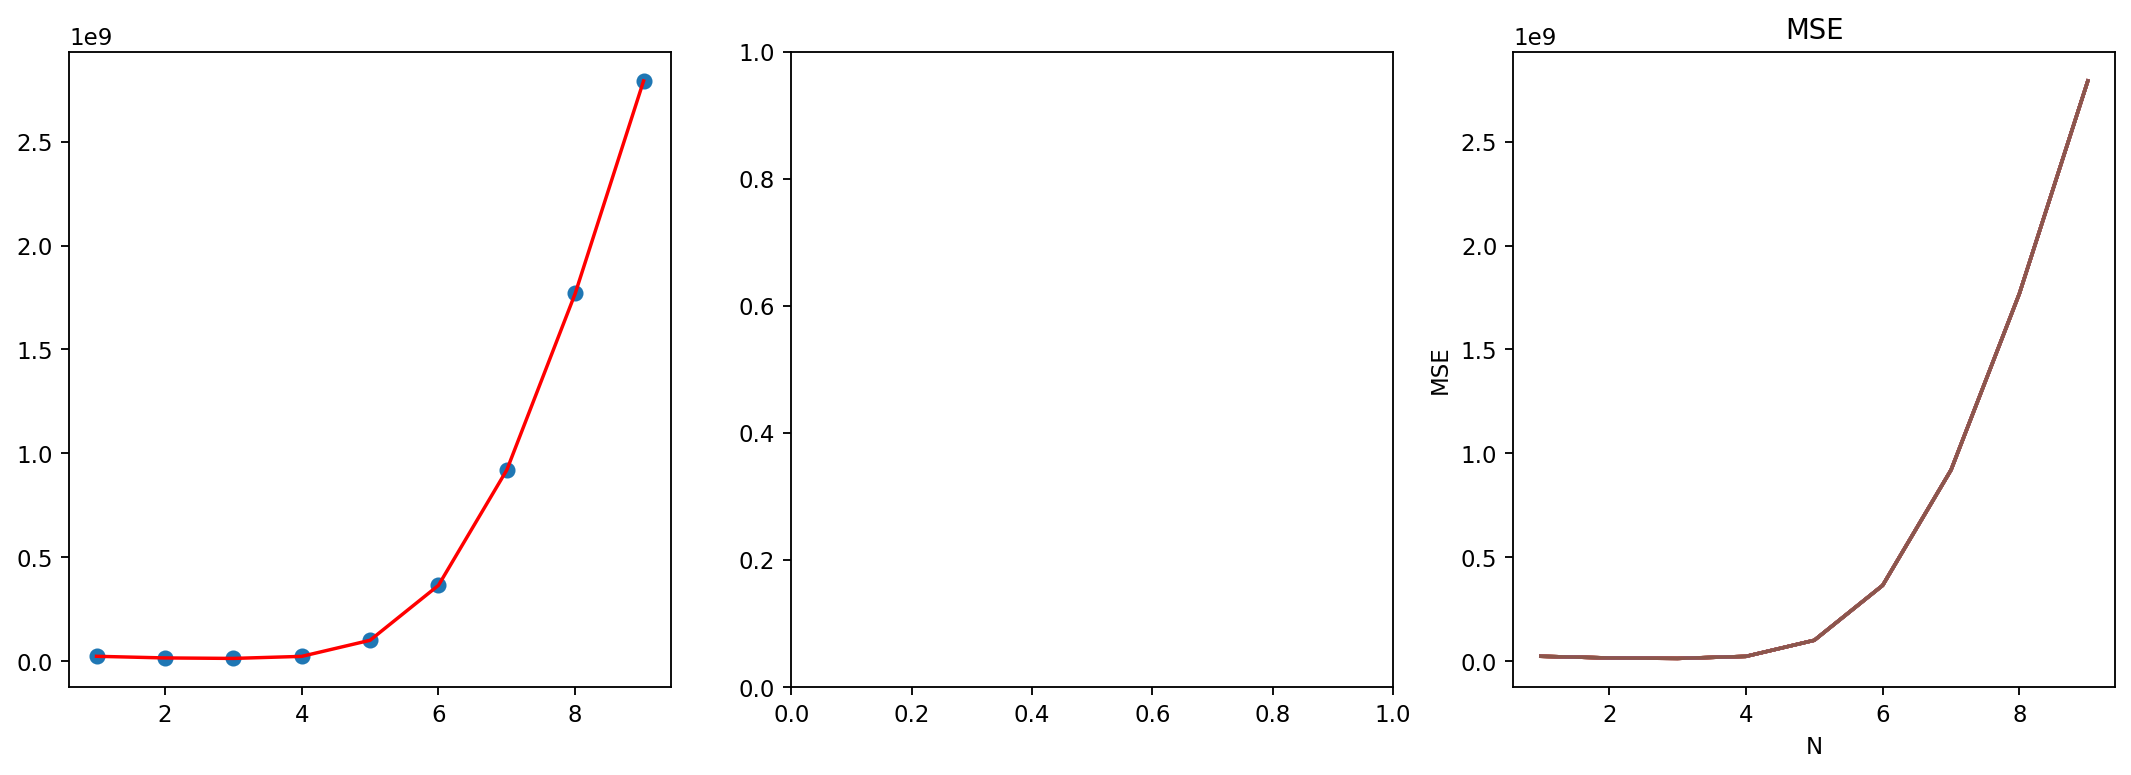

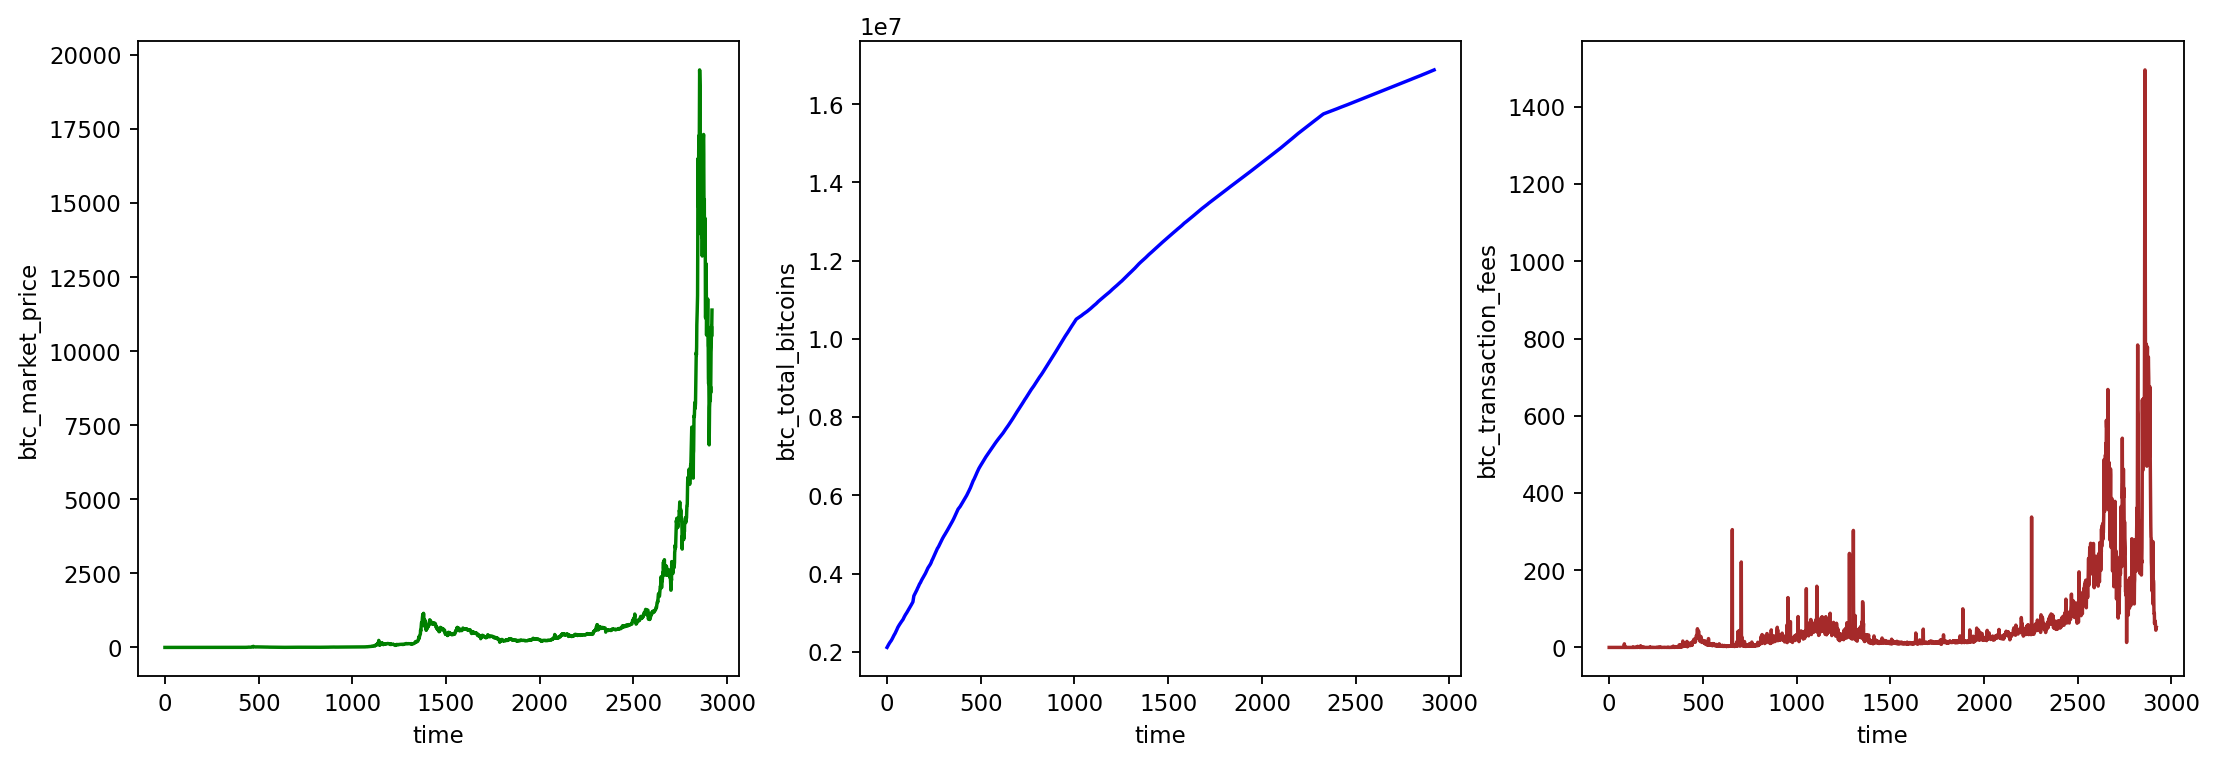

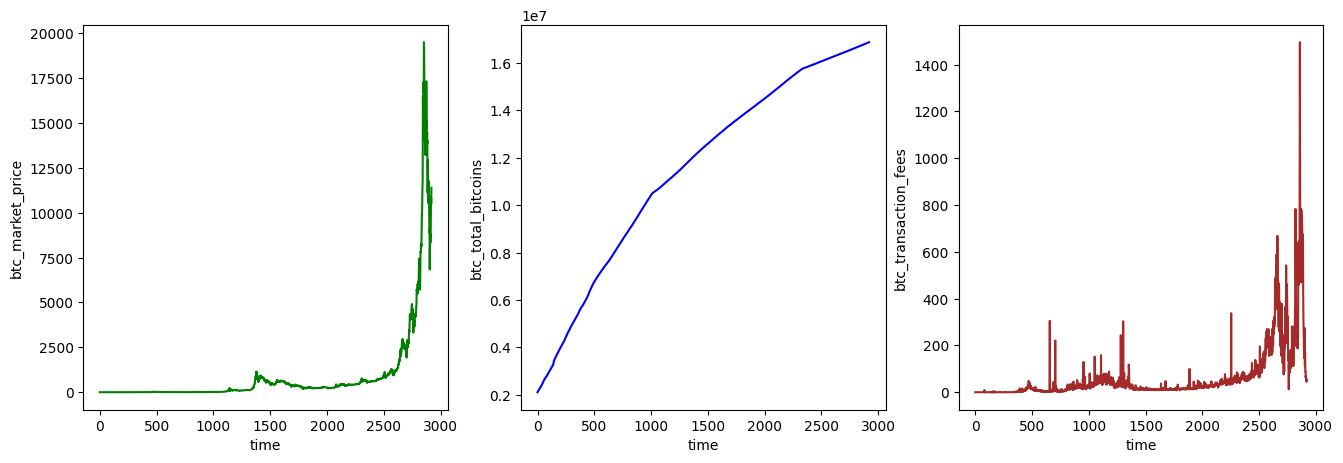

In [54]:
%matplotlib inline
from matplotlib import pyplot as plt

# 绘制子图
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 自动以第一列数据（序号）为 x 轴, 第二列数据为 y 轴绘制
axes[0].plot(data["btc_market_price"], "green")
axes[0].set_xlabel("time")
axes[0].set_ylabel("btc_market_price")

axes[1].plot(data["btc_total_bitcoins"], "blue")
axes[1].set_xlabel("time")
axes[1].set_ylabel("btc_total_bitcoins")

axes[2].plot(data["btc_transaction_fees"], "brown")
axes[2].set_xlabel("time")
axes[2].set_ylabel("btc_transaction_fees")

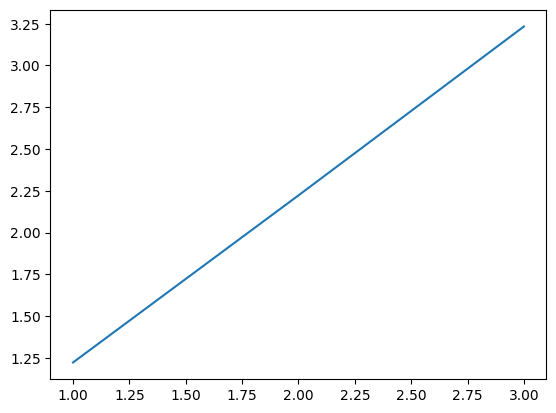

In [57]:
features = df[["btc_transaction_fees", "btc_total_bitcoins"]]
target = df[["btc_market_price"]]
features.head(), target.head()

In [6]:
split_num = int(len(features) * 0.7)

X_train = features[:split_num]
y_train = target[:split_num]

X_test = features[split_num:]
y_test = target[split_num:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2043, 2), (2043, 1), (877, 2), (877, 1))

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
poly_train = poly_features.fit_transform(X_train)
poly_X_test = poly_features.fit_transform(X_test)

In [8]:
from sklearn.linear_model import LinearRegression

model_train = LinearRegression()

# 第一个参数：自变量 x 列矩阵，即特征矩阵
model_train.fit(poly_train, y_train)

LinearRegression()

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 传入测试数据集
pred = model_train.predict(poly_X_test)
print("3 次多项式回归平均绝对误差: ", mean_absolute_error(y_test, pred.flatten()))
print("3 次多项式均方误差: ", mean_squared_error(y_test, pred.flatten()))

3 次多项式回归平均绝对误差:  1955.7982344810607
3 次多项式均方误差:  13964164.9822546


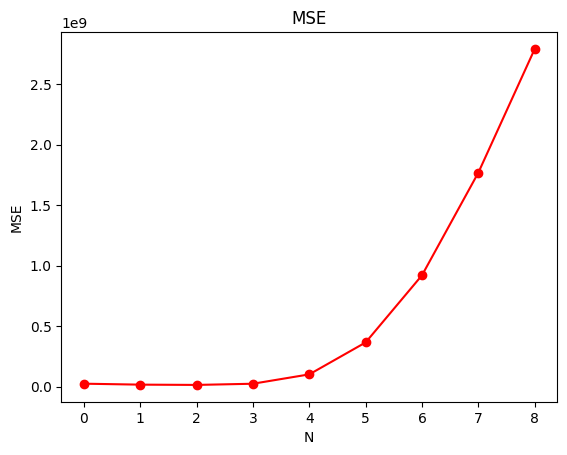

In [81]:
import numpy as np


def timesPredict(times):
    poly_features = PolynomialFeatures(degree=times, include_bias=False)
    poly_train = poly_features.fit_transform(X_train)
    poly_X_test = poly_features.fit_transform(X_test)
    model_train = LinearRegression()

    # 第一个参数：自变量 x 列矩阵，即特征矩阵
    model_train.fit(poly_train, y_train)
    pred = model_train.predict(poly_X_test)
    mse = mean_squared_error(y_test, pred.flatten())
    return mse


def poly(n):
    mses = []
    for c in range(1, n):
        mses.append(timesPredict(c))
    plt.plot(mses, "r", marker="o")
    plt.title("MSE")
    plt.xlabel("N")
    plt.ylabel("MSE")


poly(10)